# **Hello Folks! Welcome to this tutorial for Data Science with Machine Learning. This tutorial is for those who are beginners to Scikit-Learn and Machine Learning.**

# **What is Scikit-Learn?**
Scikit-Learn,often abbreviated as 'sklearn' is one of the top python libraries for Data Science.


1.  It is a simple and efficient tool for data mining and data analysis.
2.  It is a Python Library built on Numpy,Scipy and Matplotlib.
3.  It is an open-source,commercially usable,BSD License library.



# **What we can achieve using Scikit-Learn library?**
The Scikit-Learn library features various Classfication,Regression,Clustering and many more algorithms.Refer the following points for more applications of the Scikit-Learn.


*   **Classification:** Identifying which category an object belongs to. One of the applications of the Classification algorithm is Spam Detection.
*   **Regression:** Predicting an attribute associated with an object. This algorithm can be used to predict the stock prices.


*   **Clustering:** This refers to automatic grouping of similar objects into sets.One of the applications is customer segmentation.
*   **Model Selection:** Comparing,Validating and choosing parameters and models.One of the applications can be improving model efficiency via parameter tuning.


*   **Dimensionality Reduction:** Reducing the number of random variables to consider.This feature can be used to increase the model efficiency.
*   **Pre-Processing:** Feature extraction and normalization.The application can be transforming input data such as text for use with machine learning alogorithms.










# **Importing Required packages**

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

***After importing the required packages,we will now move on to loading the dataset.***
In this analysis,we will use the dataset 'winequality-red.csv' ; which I got from Kaggle.

In [64]:
redwine = pd.read_csv('winequality-red.csv')

In [65]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**The .head() function will display the top 5 rows by default. If you wish to print the first 10 rows,add 10 in the parenthesis.**

In [66]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**The .info() function will give a concise summary of the dataframe.**

In [67]:
redwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**This function will tell us the number of null values in the respective dataframe.As we can see,there are no null values in the dataframe,hence 0 is returned.**

# **Preprocessing Data**

In [68]:
bins = (2, 6.5, 8)
group_names = ['bad' , 'good']
redwine['quality'] = pd.cut(redwine['quality'], bins =  bins,labels = group_names)

**By using the above lines of code,we are going to separate the wines into two labels of quality.The wines whose quality ranges from 2 to 6.5 would be labelled as "bad" where wines ranging from 6.5 to 8 will be labelled as "good."**

In [69]:
label_quality = LabelEncoder() #The LabelEncoder() funtion is a part of the Scikit-Learn library.

In [70]:
redwine['quality'] = label_quality.fit_transform(redwine['quality'])

**This fit_transform() method is basically the combination of fit method and transform method.This method performs fit and transform on the input data at a single time and converts the data points.** 

In [71]:
redwine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


**After running the code above,we can observe the wines have been labelled as good(1) and bad(0) in terms of quality.**

In [72]:
redwine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

**After labelling and segregating the wines as good and bad we can see the actual number of wines which are good and bad in terms of quality.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


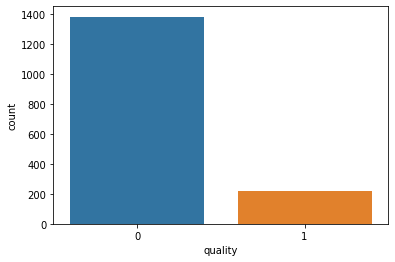

In [73]:
sns.countplot(redwine['quality'])

**We can also depict the number of good and bad wines graphically.**

# **Separating the dataset as response variable and feature variable:**


*   Response Variable: It is a variation depends on other variables. It is the subject of change within an experiment.
*   Feature Variable: A feature variable is a measurable property of the object you’re trying to analyze. In datasets, features appear as columns.



In [74]:
X = redwine.drop('quality' , axis = 1)
y = redwine['quality']

# **Training and Test Splitting of data**

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#The train_test_split() function is a part of the Scikit-Learn library.

# **Applying Standard Scaling to get optimized result**

In [76]:
sc = StandardScaler()   #The StandardScaler() funtion is a part of the Scikit-Learn library.
                        #StandardScaler removes the mean and scales each feature/variable to unit variance.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

**From the above lines of code,we can observe that our variables are now much more uniform and they have scaled themselves to the same scale.**

# **The training and testing of data is now complete.We will use the following machine learning algorithms:**


*   Random Forest Classifier
*   SVM Classifier
*   Logistic Regression




**We will also form a Neural Network using the MLP Classifier**



# **Random Forest Classifier**

In [89]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [90]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

**After executing the above lines of code,we can observe that out of 20 wines,17 are classified as bad and 3 as good.**

# **Let's see how well our model has performed:**

In [91]:
print(classification_report(y_test, rfc_pred)) 
print(confusion_matrix(y_test, rfc_pred)) 
#The classification_report and confusion_matrix function is a part of the Scikit-Learn Library.

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.71      0.51      0.59        47

    accuracy                           0.90       320
   macro avg       0.81      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

[[263  10]
 [ 23  24]]


**By using the confusion matrix,we can determine how well our model works and how accurate our model is. As you can observe from the confusion matrix,the model can determine that 264 wines are of bad quality correctly. Whereas 7 of the bad quality wines were mislabelled. The same applies to good quality wines.**

# **SVM Classifier**
**(Support Vector Model)**

In [92]:
svm=svm.SVC()
svm.fit(X_train, y_train)
svm_pred = clf.predict(X_test)

# **Let's see how well our model has performed:**

In [93]:
print(classification_report(y_test, svm_pred)) 
print(confusion_matrix(y_test, svm_pred)) 


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


**The SVM Classifier tends to work better with smaller numbers**

# **Logistic Regression**

In [94]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# **Let's see how well our model has performed:**

In [95]:
print(classification_report(y_test, lr_pred)) 
print(confusion_matrix(y_test, lr_pred)) 

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320

[[264   9]
 [ 34  13]]


# **Neural Networks**

In [96]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train, y_train)
mlpc_pred = mlpc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# **Let's see how well our model has performed:**

In [97]:
print(classification_report(y_test, mlpc_pred)) 
print(confusion_matrix(y_test, mlpc_pred)) 

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       273
           1       0.63      0.55      0.59        47

    accuracy                           0.89       320
   macro avg       0.78      0.75      0.76       320
weighted avg       0.88      0.89      0.88       320

[[258  15]
 [ 21  26]]


# **Determine the accuracy of our best model,which is RFC:**

In [85]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.909375

In [86]:
redwine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


# **That's it from my side folks! I hope that you understood the purpose of Scikit Learn and the basic functions required to perform Data Analysis on a dataset.**